

##**Qu’est-ce qu’une “fake news”?**

Expression d’origine anglaise, une fake news est toute information mensongère diffusée dans le but de manipuler ou de tromper l’opinion publique sur un sujet bien déterminé. Encore appelées infox, ces fausses nouvelles ou informations fallacieuses massivement relayées par les médias sociaux (blogs, réseaux sociaux…) peuvent émaner d’un ou plusieurs individus, des médias eux-mêmes, des personnalités publiques, ou même d’un gouvernement.

Bien qu’il n’y ait souvent aucune preuve de la véracité du contenu, il est aujourd’hui très fréquent de partager un article ou une publication dès lors que le titre est hyper accrocheur, que le contenu est sensationnel, ou qu’il nous dit tout simplement ce qu’on aimerait entendre. L’identification de fausse information a jusque là relevé d’un véritable travail journalistique. Mais grâce aux avancées technologiques, il est désormais possible d’identifier une fake news grâce à des algorithmes d’apprentissage automatique encore appelé Machine Learning.

Dans cet article, nous proposons une approche de détection de fausses informations dans le langage python. Pour ce faire, nous avons utilisé deux algorithmes de classification (apprentissage supervisé: régression logistique et arbre de décision) pour déterminer si une information est fallacieuse ou non.

##**Source , description de données et modèle**

Les données utilisées dans notre application proviennent des plateformes de presse sénégalises à partir des publications : senego
sunugal24
senegal7
seneplus
etc

il s'agit des données constituées de 864 lignes avec les contenus des diffiérents articles de presse , les auteurs , les dates de publication et le label (0 ou 1 )

###**Définition du problème**

Le problème est de développer un modèle capable de détecter avec précision les faux articles par rapport aux vrais.

###**Approche**

Il existe différentes approches possibles, telles que l’apprentissage supervisé, l’apprentissage non supervisé ou l’apprentissage profond. Pour la détection des fausses nouvelles, l’apprentissage supervisé est une approche courante. En apprentissage supervisé, le modèle est entraîné sur des données étiquetées, où la véritable classe de chaque article (réel ou faux) est connue. L’objectif est de former un modèle capable de classer avec précision les nouveaux articles inédits comme étant réels ou faux.

###**Nom du modèle**

Le modèle d'apprentissage automatique utilisé pour la détection des fausses nouvelles dans ce projet est le Passive Aggressive Classifier .

###**Description du modèle**

Le Passive Aggressive Classifier (PAC) est un type d'algorithme d'apprentissage en ligne pour les tâches de classification binaire. Il est bien adapté aux applications telles que la détection de fausses nouvelles. L'algorithme PAC met à jour son modèle en permanence à mesure que de nouvelles données arrivent, ce qui le rend efficace pour la classification en temps réel.

###**Precision du modèle**

Le classificateur passif agressif a atteint une précision impressionnante de 96 % lors de l’évaluation. Cette grande précision indique son efficacité à classer les articles de presse comme fiables ou non.

Le modèle est pré-entraîné et disponible comme model.pkldans ce référentiel, vous permettant de l'utiliser pour faire des prédictions.

N'hésitez pas à explorer le Jupyter Notebook ( Fake_News_Detector-PA.ipynb) pour plus de détails sur la formation et les performances du modèle.

##**Préparation et nettoyage des données :**

###**Importation des librairies**

In [1]:
# NumPy est une bibliothèque pour le langage de programmation Python, ajoutant la prise en charge de grands tableaux et matrices multidimensionnels,
# ainsi qu'une vaste collection de fonctions mathématiques de haut niveau pour opérer sur ces tableaux.
import numpy as np

# Pandas est une bibliothèque logicielle écrite pour le langage de programmation Python pour la manipulation et l'analyse de données.
import pandas as pd

# Matplotlib est une bibliothèque de traçage pour Python et pyplot nous donne un cadre de traçage de type MatLab. Nous l'utiliserons
# dans notre fonction plotter pour tracer des données.
import matplotlib.pyplot as plt

# Seaborn est une bibliothèque de visualisation de données Python basée sur matplotlib. Elle fournit une interface de haut niveau pour
# dessiner des graphiques statistiques attrayants et informatifs.
import seaborn as sns

# Itertools est un module dans Python, il est utilisé pour itérer sur des structures de données qui peuvent être parcourues à l'aide d'une boucle for.
import itertools

# Cela nous permet de diviser nos données en données d'entraînement et de test.
from sklearn.model_selection import train_test_split

# Le TfidfVectorizer convertit une collection de documents bruts en une matrice de caractéristiques TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer

# Les algorithmes Passive Aggressive sont des algorithmes d'apprentissage en ligne. Leur objectif est d'effectuer des mises à jour qui corrigent la perte,
#provoquant très peu de changement dans la norme du vecteur de poids.
from sklearn.linear_model import PassiveAggressiveClassifier

# Le score de précision et la matrice de confusion nous indiquent à quel point notre modèle est performant.
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import classification_report

import pickle  # Importer le module pickle

###**Preparation des données**

In [41]:
from google.colab import files
import pandas as pd

# Demander à l'utilisateur d'importer le fichier Excel
print("Veuillez importer le fichier Excel :")
uploaded = files.upload()

# Récupérer le nom du fichier
file_name = next(iter(uploaded))

# Charger le fichier Excel dans un DataFrame
articles = pd.read_excel(file_name)

Veuillez importer le fichier Excel :


Saving articles_data.xlsx to articles_data.xlsx


In [42]:

# Afficher les premières lignes du DataFrame pour vérifier l'importation
articles.head(10)

,titre,contenu,date,auteurs,triplets,label
0,L'actualité en vidéos au Sénégal,"Vidéos sur l’actualité sénégalaise, des sujets...",NaT,"Diéry Diallo, Mangoné Ka, Abdou Faty Gueye, An...",[],0
1,Dessalement d’eau de mer : Cheikh Tidiane Dièy...,Le gouvernement du Sénégal et la société ACWA ...,2024-04-22 18:46:44,"Ankou Sodjago, Cheikh Tourè","['gouvernement conclure accord', 'entreprise c...",0
2,Affirmations graves de Thierno Lô : « Boun Abd...,« Un homme merveilleux serviteur de la Républi...,2024-04-22 16:41:47,"Mouhamed Diouf, Le Vrai., Le Vrai, El H","['Abdallah partir None', 'il aller L’', 'médec...",1
3,"Pour bénéficier de l’immunité parlementaire, d...",Des sources proches de l’ancienne majorité pré...,2024-04-22 15:09:26,"Sidy Mohamet, Mor Yomble","['intérêt manifester None', 'manifesté rendre ...",0
4,Maisons et véhicules de fonction des ex-minist...,Les anciens ministres de Macky Sall sommés de ...,2024-04-22 08:15:08,"Diéry Diallo, Mamadou Diop, Allai Ouattara, Wa...","['qui donner l’', 'derniers recevoir courrier'...",0
5,"Les lundis de Madiambal : Président Diomaye, l...","Il est impossible de trouver un mot, sorti de ...",2024-04-22 11:15:27,"Khalil Kamara, Vincent Ndiaye, Pape Fall, You ...","['question sembler None', 'On pouvoir None', '...",1
6,Déclaration de politique générale de Sonko : L...,"Le ministre porte-parole du gouvernement, Mous...",2024-04-21 21:55:50,"Antoine Sarr, Sonko Yeh, Cheikh Sow, You Have ...","['ministre confirmer Assemblée', 'Ministre ren...",1
7,Véhicules de fonction : La sommation du PM Ous...,Une injonction de l’actuel Premier ministre qu...,2024-04-22 11:45:36,Khalil Kamara,"['qui risque None', 'Ousmane sommer None']",0
8,Rapports Cour des comptes : Demande d’Audience...,Le nouveau président de la République Diomaye ...,2024-04-22 12:31:07,"Mangoné Ka, You Got A Gift Unknown User. Get, ...","['président manifester volonté', 'demande mett...",1
9,Dame Mbodji réagit à la publication des rappor...,"Dame Mbodji, Secrétaire Général National du CU...",2024-04-22 14:11:37,"Sidy Mohamet, Moussa Komè, Michel Grovogui","['Dame exprimer satisfaction', 'annonce interv...",1


In [43]:
# suppression des colonnes indésirables
articles = articles.drop("titre", axis=1)
articles = articles.drop("date", axis=1)
articles = articles.drop("auteurs", axis=1)
articles = articles.drop("triplets", axis=1)

In [44]:
# Verifions le nombre de lignes et colonnes après suppression
articles.shape

(863, 2)

In [45]:
articles.head(8)

,contenu,label
0,"Vidéos sur l’actualité sénégalaise, des sujets...",0
1,Le gouvernement du Sénégal et la société ACWA ...,0
2,« Un homme merveilleux serviteur de la Républi...,1
3,Des sources proches de l’ancienne majorité pré...,0
4,Les anciens ministres de Macky Sall sommés de ...,0
5,"Il est impossible de trouver un mot, sorti de ...",1
6,"Le ministre porte-parole du gouvernement, Mous...",1
7,Une injonction de l’actuel Premier ministre qu...,0


In [46]:
# Verifions les données manquantes pour les deux colonnes
articles.isna().sum()

contenu    62
label       0
dtype: int64

<ipython-input-48-25ccbea172d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sns.countplot(x='label', data=dataFile, palette=['red', 'green', 'blue'])
<ipython-input-48-25ccbea172d6>:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  return sns.countplot(x='label', data=dataFile, palette=['red', 'green', 'blue'])


<Axes: xlabel='label', ylabel='count'>

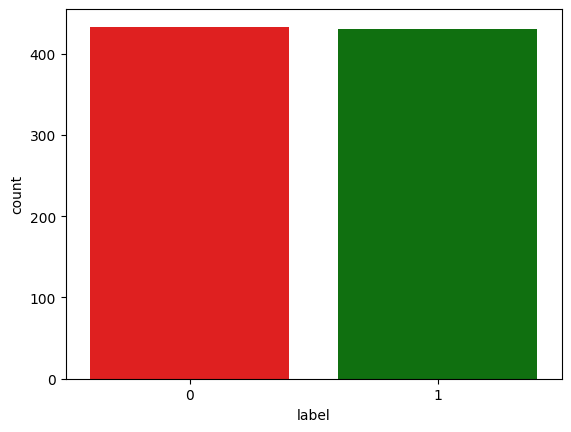

In [48]:
import seaborn as sns

def create_distribution(dataFile):
    # Crée un graphique de comptage en utilisant la colonne 'label' de dataFile
    return sns.countplot(x='label', data=dataFile, palette=['red', 'green', 'blue'])

# Utilise une liste personnalisée de couleurs
create_distribution(articles)

In [49]:
 def data_qualityCheck():
    # Définition de la fonction 'data_qualityCheck' qui effectue une vérification de la qualité des données.
    print("Checking data qualitites...")
    # Affichage d'un message pour indiquer le début de la vérification.

    articles.isnull().sum()
    # Vérification des valeurs manquantes dans le DataFrame 'articles' et calcul du nombre de valeurs manquantes pour chaque colonne.
    # Cependant, cette ligne ne produira pas de sortie visible car le résultat n'est pas affecté à une variable ou imprimé.

    articles.info()
    # Affichage des informations sur le DataFrame 'articles', telles que le nombre total d'entrées, le nombre de colonnes, le type de données de chaque colonne, et le nombre de valeurs non nulles pour chaque colonne.

    print("check finished.")
    # Affichage d'un message pour indiquer que la vérification est terminée.

# Appel de la fonction 'data_qualityCheck'.
data_qualityCheck()


Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   contenu  801 non-null    object
 1   label    863 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.6+ KB
check finished.


In [50]:
# Supprimer toutes les lignes contenant des valeurs manquantes (NaN) dans le DataFrame articles
articles = articles.dropna()

In [51]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 0 to 862
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   contenu  801 non-null    object
 1   label    801 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.8+ KB
check finished.


In [52]:
articles.shape

(801, 2)

In [53]:
articles.head(5)

,contenu,label
0,"Vidéos sur l’actualité sénégalaise, des sujets...",0
1,Le gouvernement du Sénégal et la société ACWA ...,0
2,« Un homme merveilleux serviteur de la Républi...,1
3,Des sources proches de l’ancienne majorité pré...,0
4,Les anciens ministres de Macky Sall sommés de ...,0


In [54]:
# Réinitialiser l'index du DataFrame articles après avoir supprimé les lignes contenant des valeurs manquantes
articles.reset_index(drop=True, inplace=True)

# les 10 premieres lignes
articles.head(10)

,contenu,label
0,"Vidéos sur l’actualité sénégalaise, des sujets...",0
1,Le gouvernement du Sénégal et la société ACWA ...,0
2,« Un homme merveilleux serviteur de la Républi...,1
3,Des sources proches de l’ancienne majorité pré...,0
4,Les anciens ministres de Macky Sall sommés de ...,0
5,"Il est impossible de trouver un mot, sorti de ...",1
6,"Le ministre porte-parole du gouvernement, Mous...",1
7,Une injonction de l’actuel Premier ministre qu...,0
8,Le nouveau président de la République Diomaye ...,1
9,"Dame Mbodji, Secrétaire Général National du CU...",1


In [55]:
# Extraction de la colonne 'label' du DataFrame articles et assignation à la variable label_article
label_article = articles.label

In [56]:
label_article.head(10)

0    0
1    0
2    1
3    0
4    0
5    1
6    1
7    0
8    1
9    1
Name: label, dtype: int64

In [57]:
# Suppression de la colonne 'label' du DataFrame articles
articles = articles.drop("label", axis=1)


In [58]:
articles.head(10)

,contenu
0,"Vidéos sur l’actualité sénégalaise, des sujets..."
1,Le gouvernement du Sénégal et la société ACWA ...
2,« Un homme merveilleux serviteur de la Républi...
3,Des sources proches de l’ancienne majorité pré...
4,Les anciens ministres de Macky Sall sommés de ...
5,"Il est impossible de trouver un mot, sorti de ..."
6,"Le ministre porte-parole du gouvernement, Mous..."
7,Une injonction de l’actuel Premier ministre qu...
8,Le nouveau président de la République Diomaye ...
9,"Dame Mbodji, Secrétaire Général National du CU..."


In [59]:
# Accès au contenu de la colonne 'contenu' à l'index 20 du DataFrame articles
articles['contenu'][20]

'Lors de la Ziarra générale annuelle à Tivaouane, El Malick Ndiaye, Ministre des Infrastructures et des Transports terrestres et aériens, agissant en tant que représentant du Président Diomaye Faye, a transmis le message officiel du chef de l’État lors de la cérémonie principale.\n\nParmi les personnalités présentes figurait également le ministre Cheikh Tidiane Dieye, faisant partie de la délégation officielle. C’est précisément lors de cet événement que Serigne Mansour Sy Djamil a exprimé son admiration pour les ministres du président Diomaye Faye. Ainsi, Cheikh Tidiane Dieye et le ministre directeur de cabinet Mary Teuw Niane ont reçu des éloges appuyés de la part du leader religieux.'

##**Prétraitement des données**

###**Lemmatisation**

La lemmatisation est le processus linguistique de réduction des mots fléchis (ou des formes fléchies) à leur forme de base, appelée le "lemme". En d'autres termes, la lemmatisation consiste à ramener les mots à leur forme canonique ou normale.

Le but de la lemmatisation est de normaliser les mots afin de réduire la dimensionnalité du vocabulaire et de traiter différentes formes d'un mot comme étant équivalentes. Cela peut améliorer la précision des modèles d'apprentissage automatique en réduisant le nombre de variations de mots qu'ils doivent traiter.

La lemmatisation est souvent utilisée dans le prétraitement des données textuelles avant l'analyse ou l'apprentissage automatique, en particulier dans les tâches telles que la classification de texte, l'extraction d'entités nommées et la recherche d'information.

In [60]:
# Importer les bibliothèques nécessaires
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Télécharger les ressources linguistiques pour le français si ce n'est pas déjà fait
nltk.download('stopwords')

# Initialiser le lemmatiseur
lemmatizer = None  # En français, nous n'utilisons pas de lemmatiseur spécifique dans NLTK

# Obtenir les mots vides (stopwords) en français
stpwrds = stopwords.words('french')

stpwrds

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [61]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Télécharger les ressources nécessaires pour NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
# Initialiser le lemmatiseur
lemmatizer = WordNetLemmatizer()

# Obtenir la liste des mots vides pour le français
stpwrds = set(stopwords.words('french'))

# Parcours de chaque ligne du DataFrame articles
for x in range(len(articles)):

    # Initialise une liste pour stocker les mots lemmatisés
    corpus = []

    # Récupère le texte de la colonne 'contenu' à l'index x
    review = articles['contenu'][x]

    # Supprime tous les caractères qui ne sont pas des lettres ou des espaces
    review = re.sub(r'[^a-zA-Z\s]', '', review)

    # Convertit le texte en minuscules
    review = review.lower()

    # Tokenise le texte en mots individuels
    review = nltk.word_tokenize(review)

    # Parcours de chaque mot dans le texte
    for y in review:

        # Vérifie si le mot n'est pas dans la liste des mots vides
        if y not in stpwrds:

            # Lemmatise le mot et l'ajoute à la liste corpus
            lemma = lemmatizer.lemmatize(y, pos='v')  # Utilisez 'v' pour le verbe, 'n' pour le nom, etc. selon le contexte
            corpus.append(lemma)

    # Reconstitue le texte en joignant les mots lemmatisés
    review = ' '.join(corpus)

    # Remplace le texte original par le texte lemmatisé dans la colonne 'contenu' du DataFrame articles
    articles.loc[x, 'contenu'] = review


In [63]:
articles['contenu'][20]  #affiche le contenu texte à l'index 20

'lors ziarra gnrale annuelle tivaouane el malick ndiaye ministre infrastructures transport terrestres ariens agissant tant reprsentant prsident diomaye faye a transmis message officiel chef ltat lors crmonie principale parmi personnalits prsentes figurait galement ministre cheikh tidiane dieye faisant partie dlgation officielle cest prcisment lors cet vnement serigne mansour sy djamil a exprim admiration ministres prsident diomaye faye ainsi cheikh tidiane dieye ministre directeur cabinet mary teuw niane reu log appuys part leader religieux'

###**Division du jeu de données en données d'entrainement et données de test**

In [64]:
# Division du jeu de données en jeu de données d'entraînement et jeu de données de test
# 80% des données seront utilisées pour l'entraînement et 20% pour les tests (c'est-à-dire test_size=0.2)
from sklearn.model_selection import train_test_split

X_articles, X_test, Y_articles, Y_test = train_test_split(articles['contenu'], label_article, test_size=0.2, random_state=0)

In [65]:
X_articles

364    xalimanewspaul sne a lors dune violente attaqu...
458    classe politique sngalaise deuil effet maguett...
76     suite mise place nouveau gouvernement nominati...
64     prsident sngalais macky sall a dclench controv...
638    france lacteur francosngalais omar sy honor tr...
                             ...                        
763    mobile crime nianing bless mre meurtrire senew...
192    accueil sngal actualits socit ncrologie luc ni...
629    psg fait quil faut terrain raisons dsamour ent...
559    rfm radio ecoutez meilleur radio sud fm ecoute...
684    avoir courage dfendre mordicus projet contre s...
Name: contenu, Length: 640, dtype: object

In [66]:
X_articles.shape

(640,)

In [67]:
Y_articles

364    1
458    1
76     1
64     0
638    1
      ..
763    0
192    0
629    0
559    0
684    0
Name: label, Length: 640, dtype: int64

###**Conversion des données textuelles en données numériques**

conversion des données textuelles en vecteur de caractéristiques numériques

tf (fréquence de terme) : qui compte le nombre de fois qu'un mot particulier se répète dans un document.

idf (fréquence inverse de document) : mesure si le mot est un mot rare ou un mot commun dans un document.

In [68]:
# Conversion des données textuelles en données numériques/vecteur de caractéristiques

# Initialisation du vectoriseur TF-IDF
tfidf_v = TfidfVectorizer()

# Transformation des données d'entraînement en vecteurs TF-IDF
tfidf_X_articles = tfidf_v.fit_transform(X_articles)

# Transformation des données de test en vecteurs TF-IDF en utilisant les mêmes termes que ceux appris sur les données d'entraînement
tfidf_X_test = tfidf_v.transform(X_test)

# Affichage des vecteurs TF-IDF des données d'entraînement et de test
print(tfidf_X_articles, tfidf_X_test)


  (0, 14514)	0.07220593798474272
  (0, 1399)	0.04401413072144512
  (0, 5319)	0.09979944996507704
  (0, 19940)	0.083604057245059
  (0, 16483)	0.06585547333478872
  (0, 11670)	0.08958129482724307
  (0, 12272)	0.04803336467487581
  (0, 13165)	0.054232285859279084
  (0, 7178)	0.07466859613494702
  (0, 8688)	0.083604057245059
  (0, 4050)	0.052347806980168346
  (0, 20863)	0.08629178361045667
  (0, 1237)	0.09382221238289296
  (0, 17261)	0.07338590210722501
  (0, 11047)	0.0793631396894091
  (0, 15367)	0.07220593798474272
  (0, 6701)	0.031404361820280634
  (0, 1098)	0.0793631396894091
  (0, 10785)	0.09979944996507704
  (0, 3839)	0.03675419911153901
  (0, 8394)	0.09979944996507704
  (0, 17570)	0.083604057245059
  (0, 8506)	0.0776268196628749
  (0, 20837)	0.05678660242960309
  (0, 17001)	0.05457119002040438
  :	:
  (639, 14674)	0.023360043589378786
  (639, 13012)	0.021618791468475933
  (639, 1212)	0.08250837930239097
  (639, 13903)	0.0334776865024187
  (639, 5718)	0.03299822260383826
  (639, 2035

In [69]:
tfidf_X_articles.shape

(640, 21297)

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matrice de confusion',
                          cmap=plt.cm.Blues):

    # Affichage de la matrice de confusion sous forme d'image avec une colormap
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)  # Titre de la matrice de confusion
    plt.colorbar()  # Barre de couleur pour référence
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)  # Étiquettes des axes x
    plt.yticks(tick_marks, classes)  # Étiquettes des axes y

    # Normalisation de la matrice de confusion si demandé
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrice de confusion normalisée")
    else:
        print('Matrice de confusion non normalisée')

    # Détermination d'un seuil pour le texte à afficher
    thresh = cm.max() / 2.

    # Ajout des annotations à chaque cellule de la matrice de confusion
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Ajustement du layout
    plt.tight_layout()
    plt.ylabel('Vrai label')  # Étiquette de l'axe y
    plt.xlabel('Label prédit')  # Étiquette de l'axe x


##**Classification du modèle : PASSIVE AGRESSIVE CLASSIFIER**

Les algorithmes passifs-agressifs sont généralement utilisés pour l'apprentissage à grande échelle. C'est l'un des rares algorithmes d'apprentissage en ligne. Dans les algorithmes d'apprentissage automatique en ligne, les données d'entrée arrivent dans un ordre séquentiel et le modèle d'apprentissage automatique est mis à jour étape par étape, contrairement à l'apprentissage par lots, où l'ensemble des données d 'l'entraînement est utilisé une fois. Ceci est très utile dans les situations où il y a une énorme quantité de données et il est impossible de former l'ensemble des données en raison de la taille massive des données. Nous pouvons simplement dire qu'un algorithme d'apprentissage en ligne obtiendra un exemple d'entraînement, mettra à jour le classificateur, puis jettera cet exemple.

In [71]:
# Crée une instance du classificateur PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier()

# Entraîne le modèle de classification en utilisant les données d'entraînement
# tfidf_X_articles: les données d'entraînement (matrice TF-IDF des caractéristiques textuelles)
# Y_articles: les étiquettes de classe correspondantes pour les données d'entraînement
classifier.fit(tfidf_X_articles, Y_articles)

PassiveAggressiveClassifier()

###**SCORE DE PRÉCISION & MATRICE DE CONFUSION**

Le score de précision et la matrice de confusion sont deux métriques utilisées couramment pour évaluer les performances d'un modèle de classification.

Score de précision :
Le score de précision est une mesure qui indique la proportion d'instances correctement classées par rapport au nombre total d'instances. Il est calculé en divisant le nombre de prédictions correctes par le nombre total de prédictions. Un score de précision de 1.0 signifie que le modèle a classé correctement toutes les instances, tandis qu'un score de 0.0 signifie que le modèle n'a pas classé correctement aucune instance.

Matrice de confusion :
La matrice de confusion est un outil de visualisation qui permet d'évaluer les performances d'un modèle de classification en comparant les prédictions avec les valeurs réelles. C'est une matrice carrée où chaque ligne représente une classe réelle et chaque colonne représente une classe prédite. Les éléments de la matrice représentent le nombre d'instances classées dans chaque combinaison de classe réelle et prédite.
Voici un exemple de matrice de confusion pour un problème de classification binaire :

Prédiction
                 Positive | Négative
Réelle  Positive     TP   |   FN
        Négative     FP   |   TN

TP (True Positives) : Nombre d'instances positives correctement classées comme positives.
FN (False Negatives) : Nombre d'instances positives incorrectement classées comme négatives.
FP (False Positives) : Nombre d'instances négatives incorrectement classées comme positives.
TN (True Negatives) : Nombre d'instances négatives correctement classées comme négatives.

La matrice de confusion permet d'identifier les types d'erreurs commises par le modèle et d'analyser plus en détail ses performances. Par exemple, un modèle avec beaucoup de faux positifs peut être problématique dans certains cas, tandis qu'un modèle avec beaucoup de faux négatifs peut être préoccupant dans d'autres situations.
Ensemble, le score de précision et la matrice de confusion fournissent des informations précieuses pour évaluer et comprendre les performances d'un modèle de classification.

Accuracy: 55.9%


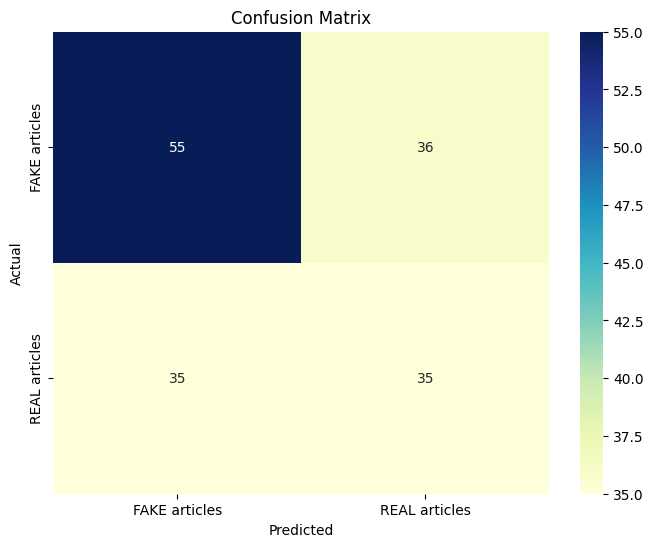

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Importer le module metrics de sklearn
from sklearn import metrics

# Score de précision sur les données de test
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')

# Matrice de confusion
cm = metrics.confusion_matrix(Y_test, Y_pred)

# Tracer la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d', xticklabels=['FAKE articles', 'REAL articles'], yticklabels=['FAKE articles', 'REAL articles'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###**RAPPORT DE CLASSIFICATION**

In [73]:
## affichera un rapport détaillé sur les performances du modèle de classification
## sur les données de test. Voici une explication des différentes parties du rapport :
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.61      0.60      0.61        91
           1       0.49      0.50      0.50        70

    accuracy                           0.56       161
   macro avg       0.55      0.55      0.55       161
weighted avg       0.56      0.56      0.56       161



Pour le label 1 (vraie information) :

Précision de 0.46 : Seulement 46% des instances prédites comme étant des vraies informations sont effectivement des vraies informations. C'est assez faible, ce qui signifie que le modèle a tendance à classer de nombreuses fausses informations comme vraies.
Rappel de 0.51 : 51% des vraies informations présentes dans les données de test ont été correctement identifiées par le modèle. Environ la moitié des vraies informations sont manquées.
F1-score de 0.48 : Combinaison médiocre de la précision et du rappel pour cette classe.

Pour le label (fausse information) :

Précision de 0.59 : Environ 6 instances sur 10 prédites comme fausses informations sont effectivement des fausses informations. C'est un peu mieux que pour la classe 1, mais toujours modeste.
Rappel de 0.53 : Seulement 53% des fausses informations présentes dans les données ont été correctement identifiées par le modèle. Près de la moitié sont manquées.
F1-score de 0.55 : Légèrement meilleur que pour la classe 1, mais reste faible.

Globalement :

Exactitude de 0.52 : Seulement 52% des instances (vraies ou fausses informations) ont été correctement classées par le modèle.
Les moyennes macro et pondérées confirment des performances assez faibles, autour de 0,52 pour les différentes métriques.

En résumé, ce modèle ne parvient pas à bien distinguer les vraies des fausses informations. Les scores de précision, rappel et f1-score sont plutôt bas pour les deux classes. Il a tendance à se tromper de manière équivalente sur les deux types d'informations. Des améliorations sont nécessaires, peut-être en ajustant les paramètres du modèle ou en enrichissant les données d'entraînement, pour obtenir de meilleures performances dans la détection des vraies et fausses informations.

Ces scores de précision sont dues simplement aux etiquetages des données extraites des sites de presses .Il est très de vérifier sur les sites sénégalais de presse si un article est vrai ou faux

###**SAUVEGARDER ET CHARGER UN MODÈLE**

Il est souvent nécessaire de sauvegarder un modèle enseigné pour pouvoir l'utiliser ultérieurement sans avoir à le réentraîner. Cela permet également de partager le modèle avec d'autres personnes ou de le déployer dans un environnement différent. De même, il est utile de pouvoir charger un modèle précédemment sauvegardé.
La bibliothèque scikit-learn fournit des fonctions pour sauvegarder et charger des modèles enseignés dans un format sérialisé sur le disque. Voici comment procéder :

In [74]:
# Enregistrer le modèle sur le disque
pickle.dump(classifier, open('./model.pkl', 'wb'))
pickle.dump(tfidf_v, open('vector.pkl', 'wb'))

# Charger le modèle depuis le disque
loaded_model = pickle.load(open('./model.pkl', 'rb'))
vector_form = pickle.load(open('vector.pkl', 'rb'))

In [75]:
X_test

8      nouveau prsident rpublique diomaye faye a mani...
253    lattaquant chelsea nicolas jackson a fait bila...
85     ministre allemand affaires trangres a dclar su...
406    utilisons cookies garantir meilleure exprience...
14     dame mbodji ragit publication rapports corps c...
                             ...                        
48     anciens ministres jusqu lundi avril restituer ...
210    loffice national lutte contre fraude corruptio...
338    petite enfance priode cruciale dveloppement du...
473    groupe parlementaire bby a dcid mettre leau so...
202    accueil sngal actualits tmoignages augustin se...
Name: contenu, Length: 161, dtype: object

In [ ]:
# Exemple de définition de la fonction fake_news_det
def fake_news_det(news):
    # Charger le modèle et le vecteur depuis les fichiers pickle
    try:
        loaded_model = pickle.load(open('./model.pkl', 'rb'))
        vector_form = pickle.load(open('vector.pkl', 'rb'))
    except FileNotFoundError:
        return "Erreur : Les fichiers modèle ou vecteur sont introuvables."

    # Transformer la nouvelle en vecteur
    vectorized_news = vector_form.transform([news])

    # Prédire avec le modèle
    prediction = loaded_model.predict(vectorized_news)

    # Retourner le résultat de la prédiction
    return "Fausse info" if prediction == 1 else "Vraie info"

# Obtenir la nouvelle de l'utilisateur
news = str(input("Entrer le texte de l'article à vérifier:"))

# Utiliser la fonction fake_news_det
result = fake_news_det(news)

# Afficher le résultat
print(result)